## Problem 3: 

#### Produce random points following $h(x) \sim \exp(-x/3)\cos(x)^2$ in the interval $[0, \infty]$ and estimate the integral of $h(x)$ in the defined range.

*Solution Example to Problem 3*:<br>

This is a harder problem than the two above. The function can neither be integrated and then inverted nor bounded in $x$. Therefore, one has to combine the two methods. First, we want to generate numbers according to __"a smart box"__, i.e. with a function that covers $h(x)$, i.e. is always greater than $h(x)$ and can be produced using the transformation method. In our case, the exponential function $k(x) = 1/3 \exp(-x/3)$ serves the purpose very well.

We thus draw $x$-values from $k(x)$ (transformation method) and accept the $x$-value if a random value $y$ (chosen between 0 and $k(x)$ falls below the functional value of $h(x)$ at the chosen $x$-value (accept/reject).

In [92]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm           # Functions from SciPy Stats...

In [93]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [94]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 1000    # Number

In [95]:
x_exp = -1*np.log(r.uniform(size=N_points))

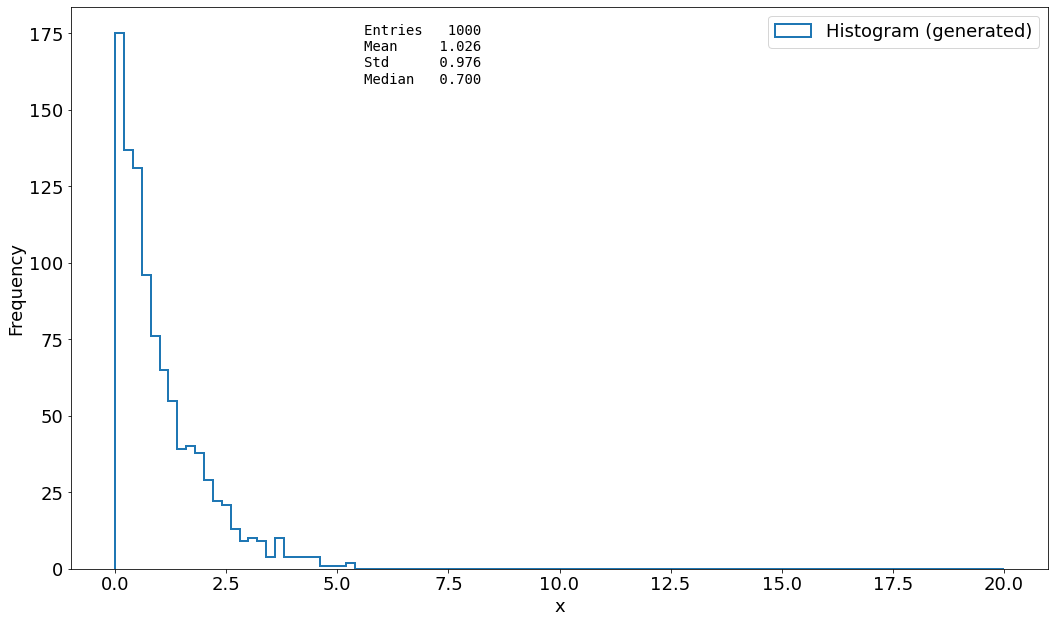

In [98]:

# f(x)
def exp_func(x) :
    # Normalization is N_points * binwidth:
    k = (xmax - xmin) / Nbins
    N = N_points * k
    return N * 1/1 * np.exp(-x/1)

# Define a reasonable range to plot in:
xmin = 0
xmax = 20
Nbins = 100
binwidth = (xmax - xmin) / Nbins
x_median = np.median(x_exp)

# plot sum
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(x_exp, bins=Nbins, range=(xmin, xmax), histtype='step', linewidth=2,label='Histogram (generated)' )
ax.set(xlabel="x", ylabel="Frequency", xlim=(xmin-1.0, xmax+1.0)) # 不知道为什么原来是"Frequency / 0.2"

# Plot f(x)
x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = exp_func(x_axis1)
#ax.plot(x_axis1, y_axis1, 'r-', label='Function (not fitted)')

# Define figure text
d = {'Entries': len(x_exp),
     'Mean': x_exp.mean(),
     'Std': x_exp.std(ddof=1),
     'Median':x_median
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.3, 0.97, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

# Save figure
fig.savefig("problem3.2.png", dpi=600)